# This notebook is prepared by ApplAi's Technical And Training Depratment.
- Please Don't use it outside the training without asking for permission as it's considered as Violation of Intellectual property rights

![ApplAi's Logo](https://media-exp1.licdn.com/dms/image/C4E0BAQHGLGltI2rzuQ/company-logo_200_200/0?e=2159024400&v=beta&t=adq8rNV09dPC6egdJMnfARt6Aq0TC9bSomFvFtm50WM)

### Task 1: Importing libraries and Exploring the Dataset.

### Task 2: Definining Exploratory Data Analysis with an overview of the whole project .

### Task 3: Checking missing values and Outliers & Creating visual methods to analyze the data.

### Task 4: creat a model that fits the data

### Task 5: creating an accurecy table


###

### Task 1: Importing libraries and Exploring the Dataset.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

### Task 2: Definining Exploratory Data Analysis with an overview of the whole project

In [ ]:
df=pd.read_excel("Personal Bank Loan Classification.xlsx",sheet_name='Data')

In [ ]:
df.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [ ]:
#Information about train Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
df.shape

(5000, 14)

In [ ]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 5000, dtype: bool

In [ ]:
df.drop_duplicates()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [ ]:
df['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [ ]:
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [ ]:
df['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [ ]:
df['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [ ]:
df['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [ ]:
df['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [ ]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

- Categorical Columns:

    - Securities Account (0 / 1)
    - Education(1: Undergrad; 2: Graduate; 3: Advanced/Professional)
    - CD Account (0/1)
    - Online(0/1)
    - CreditCard(0/1)
    - Personal Loan(0/1)

    
- Numerical Columns:
    
    - Age
    -Experience
    -Income
    -ZIPCode
    -Family
    -CCAvg	Avg.
	-Mortgage
   

### Task 3: Checking missing values and Outliers & Creating visual methods to analyze the data.

In [ ]:
# Identify missing values:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

<Axes: xlabel='CreditCard', ylabel='count'>

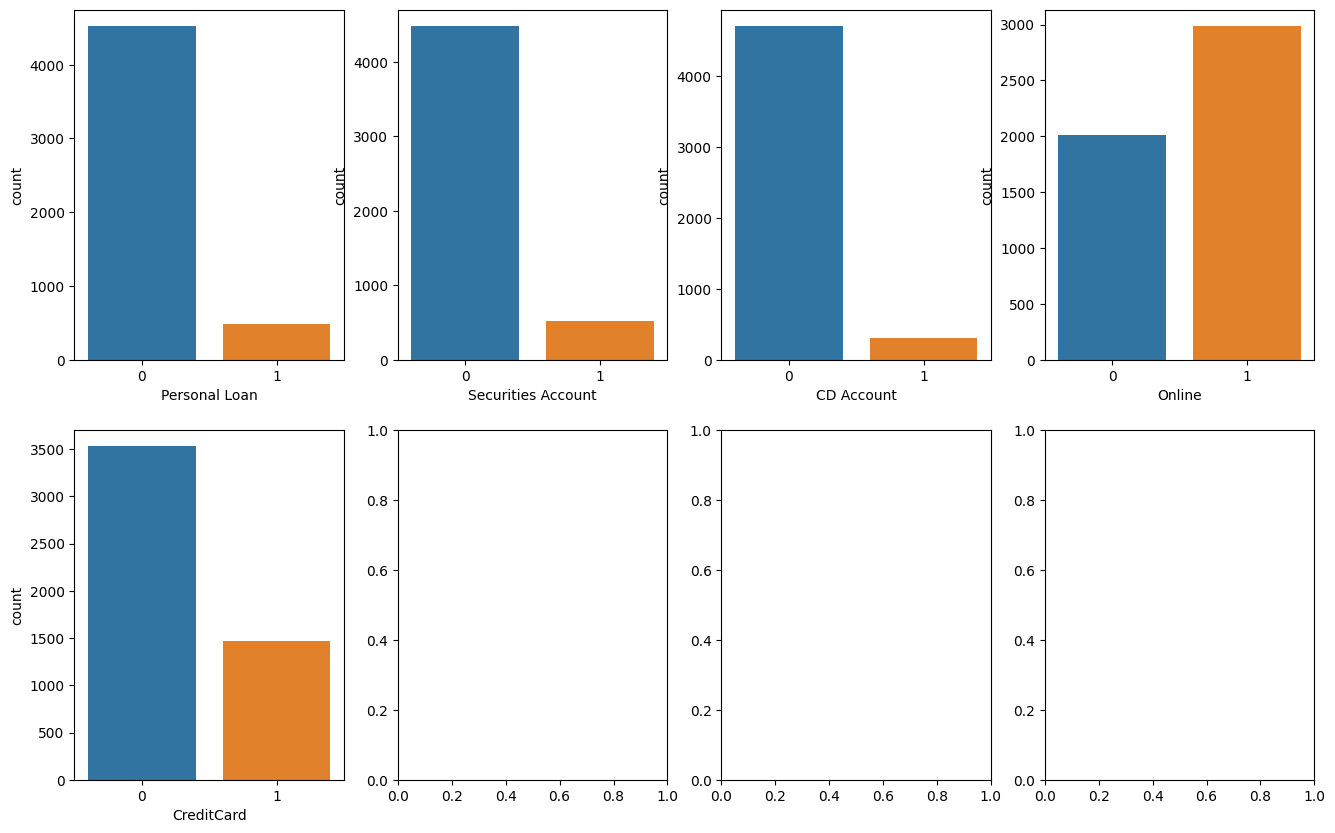

In [ ]:
fig,ax = plt.subplots(2,4,figsize=(16,10))
sns.countplot(x='Personal Loan', data = df, ax=ax[0][0])
sns.countplot(x='Securities Account', data = df, ax=ax[0][1])
sns.countplot(x='CD Account', data = df, ax=ax[0][2])
sns.countplot(x='Online', data = df, ax=ax[0][3])
sns.countplot(x='CreditCard', data = df, ax=ax[1][0])


In [ ]:
# check outliers
columns = [ 'Age', 'Experience', 'Income','Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard']
for col in columns:
    # calculate interquartile range
    q25, q75 = np.percentile(df[col], 25), np.percentile(df[col], 75)
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
    outliers = ( ( df[col] < lower) | (df[col] > upper) )
    index_label = df[outliers].index
    print(f'Number of outliers in {col}: {len(index_label)}')
   # df.drop(index_label, inplace=True)

Number of outliers in Age: 0
Number of outliers in Experience: 0
Number of outliers in Income: 96
Number of outliers in Family: 0
Number of outliers in CCAvg: 324
Number of outliers in Education: 0
Number of outliers in Mortgage: 291
Number of outliers in Personal Loan: 480
Number of outliers in Securities Account: 522
Number of outliers in CD Account: 302
Number of outliers in Online: 0
Number of outliers in CreditCard: 0


In [ ]:
x=df.corr()
x["Personal Loan"]

ID                   -0.024801
Age                  -0.007726
Experience           -0.007413
Income                0.502462
ZIP Code              0.000107
Family                0.061367
CCAvg                 0.366891
Education             0.136722
Mortgage              0.142095
Personal Loan         1.000000
Securities Account    0.021954
CD Account            0.316355
Online                0.006278
CreditCard            0.002802
Name: Personal Loan, dtype: float64

<Axes: >

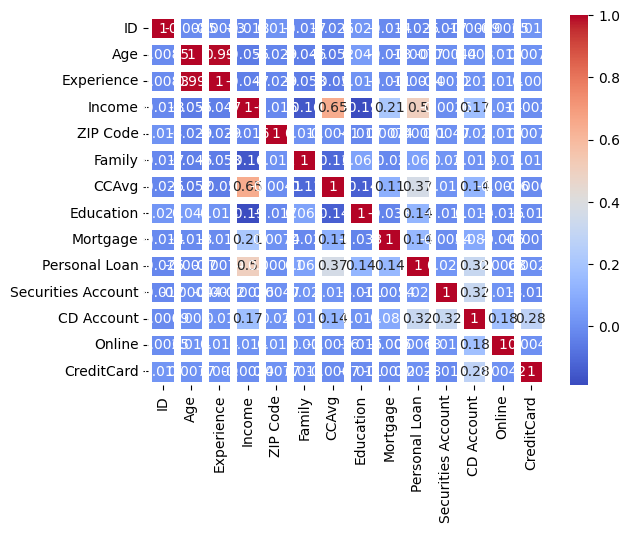

In [ ]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True,linewidths=5)

In [ ]:
df.rename(columns={"Securities Account":"Securities_Account"},inplace=True)
df.rename(columns={"CD Account":"CD_Account"},inplace=True)
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [ ]:
df=df.drop(columns=['ID','ZIP Code','Age','Experience','Online','CreditCard'])
df

,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities_Account,CD_Account
0,49,4,1.6,1,0,0,1,0
1,34,3,1.5,1,0,0,1,0
2,11,1,1.0,1,0,0,0,0
3,100,1,2.7,2,0,0,0,0
4,45,4,1.0,2,0,0,0,0
...,...,...,...,...,...,...,...,...
4995,40,1,1.9,3,0,0,0,0
4996,15,4,0.4,1,85,0,0,0
4997,24,2,0.3,3,0,0,0,0
4998,49,3,0.5,2,0,0,0,0


### Task 4: creat a model that fits the data

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

# **StandardScaler**

In [ ]:
from sklearn.preprocessing import StandardScaler
Sc=StandardScaler().fit(X_train)
print(Sc)

StandardScaler()


In [ ]:
Sc.mean_

array([7.40537143e+01, 2.41742857e+00, 1.96304286e+00, 1.87485714e+00,
       5.55637143e+01, 1.08000000e-01, 6.25714286e-02])

In [ ]:
Sc.scale_

array([46.2479649 ,  1.15895727,  1.75075488,  0.83549599, 99.96129078,
        0.31038041,  0.24219051])

In [ ]:
X_train_scaled=Sc.transform(X_train)

In [ ]:
print(X_train_scaled.mean(axis=0))

[-1.42108547e-16  1.40332190e-16  5.68434189e-17  1.40078425e-16
  2.33464042e-17  4.06024420e-17  1.72560379e-17]


In [ ]:
print(X_train_scaled.std(axis=0))

[1. 1. 1. 1. 1. 1. 1.]


In [ ]:
Sc=StandardScaler().fit(X_test)
print(Sc)

StandardScaler()


In [ ]:
Sc.mean_

array([7.31220000e+01, 2.34733333e+00, 1.87927778e+00, 1.89533333e+00,
       5.86806667e+01, 9.60000000e-02, 5.53333333e-02])

In [ ]:
Sc.scale_

array([ 45.50773322,   1.11893978,   1.73844067,   0.84953608,
       105.62522438,   0.29459124,   0.22862973])

In [ ]:
X_test_scaled=Sc.transform(X_test)

In [ ]:
print(X_test_scaled.mean(axis=0))

[-2.36847579e-18  7.34227494e-17  1.14871076e-16  6.51330841e-17
 -1.18423789e-17 -5.32907052e-17 -2.36847579e-17]


In [ ]:
print(X_test_scaled.std(axis=0))

[1. 1. 1. 1. 1. 1. 1.]


In [ ]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

# **Task 5: creating an accuracy table**

In [ ]:
X = df.drop('Personal Loan', axis='columns')
Y = df['Personal Loan']

In [ ]:
# Predicting the Test set results
y_pred = lr.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1351,   21],
       [  52,   76]])

In [ ]:
from sklearn.metrics import classification_report
cr=classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1372
           1       0.78      0.59      0.68       128

    accuracy                           0.95      1500
   macro avg       0.87      0.79      0.82      1500
weighted avg       0.95      0.95      0.95      1500



In [ ]:
acc=accuracy_score(y_test, y_pred)
acc

0.9513333333333334

<Axes: xlabel='Personal Loan'>

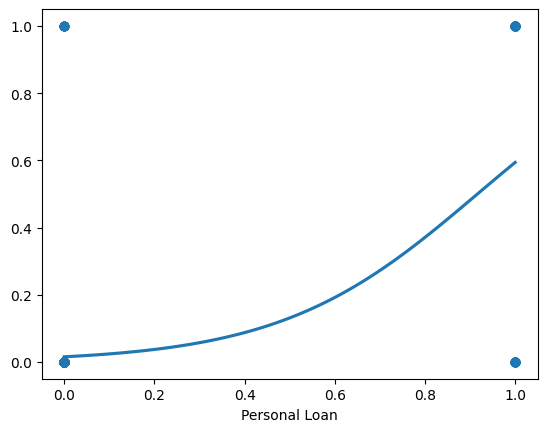

In [ ]:
sns.regplot(x=y_test,y=y_pred,data=df,logistic=True,ci=None)

# **Loading model by joblib:**


In [ ]:
import joblib
joblib_file="Personal Bank Loan Classification model"
joblib.dump(lr,joblib_file)

loaded_model=joblib.load(open(joblib_file,'rb'))


In [ ]:
pred_y=loaded_model.predict(X_test)
result=np.round(accuracy_score(y_test,y_pred),2)
print(result)

0.95
